<a href="https://colab.research.google.com/github/SaeedArisha/ModelDeployment/blob/master/FashionMnistTfServing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import tempfile
import requests

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
TensorFlow version: 2.2.0


In [14]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   4576      0 --:--:-- --:--:-- --:--:--  4569
OK


In [15]:
!apt-get update 

Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:5 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server-universal amd64 Packages [349 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [93.1 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [958 kB]
Get:12 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflo

In [16]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 187 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.2.0 [187 MB]
Fetched 187 MB in 5s (41.0 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.2.0_all.deb ...
Unpacking tensorflow-model-server (2.2.0) ...
Setting up tensorflow-model-server (2.2.0) ...


In [0]:
## Loading scaling and training fashion_mnist

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#Scaling the images 
X_train = X_train/255.0
X_test = X_test/255.0

# reshape for feeding into the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print('\nX_train.shape: {}, of {}'.format(X_train.shape, X_train.dtype))
print('X_test.shape: {}, of {}'.format(X_test.shape, X_test.dtype))


X_train.shape: (60000, 28, 28, 1), of float64
X_test.shape: (10000, 28, 28, 1), of float64


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#Model 

model = keras.Sequential(
    [keras.layers.Conv2D(input_shape=(28,28,1), filters= 8, kernel_size=3, strides=2, activation="relu", name='Conv1'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')]
)
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5359 - accuracy: 0.8181
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3789 - accuracy: 0.8675
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8779
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3253 - accuracy: 0.8846
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8891
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3007 - accuracy: 0.8926
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2915 - accuracy: 0.8951
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.8979
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.9016
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [11]:
MODEL_DIR = tempfile.gettempdir()
version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 84
drwxr-xr-x 2 root root  4096 Jun 13 10:12 assets
-rw-r--r-- 1 root root 76183 Jun 13 10:12 saved_model.pb
drwxr-xr-x 2 root root  4096 Jun 13 10:12 variables


In [12]:
#checkig metadata of the model
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Softmax'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0613 10:13:01.319935 140213451990912 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/pytho

In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [19]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=Fashion \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [20]:
!tail server.log

2020-06-13 10:19:58.771463: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-06-13 10:19:58.786386: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-06-13 10:19:58.804710: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /tmp/2
2020-06-13 10:19:58.808895: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 38792 microseconds.
2020-06-13 10:19:58.809353: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /tmp/2/assets.extra/tf_serving_warmup_requests
2020-06-13 10:19:58.809462: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: Fashion version: 2}
2020-06-13 10:19:58.81

In [34]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:10].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


In [0]:
import matplotlib.pyplot as plt

def show(idx, title):
  plt.figure()
  plt.imshow(X_test[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

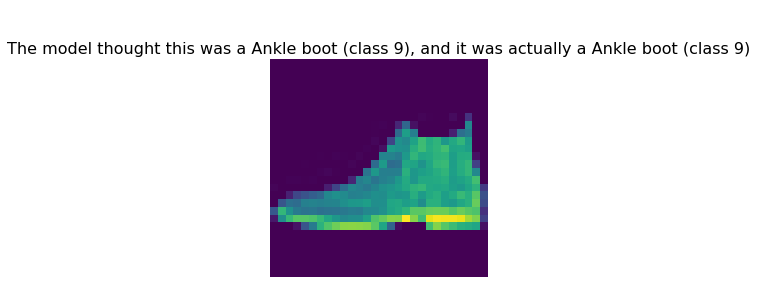

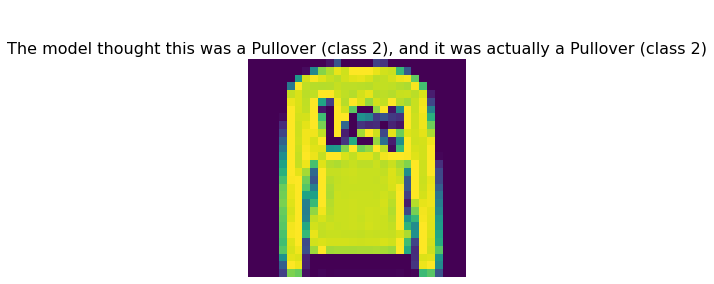

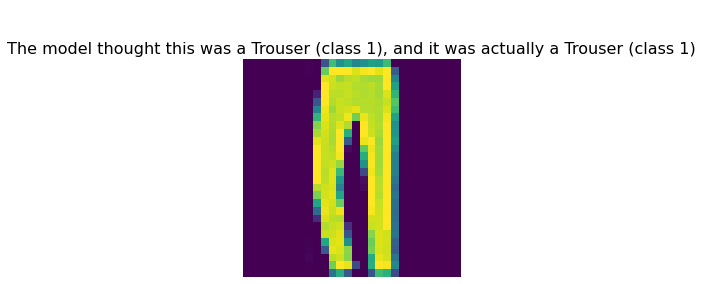

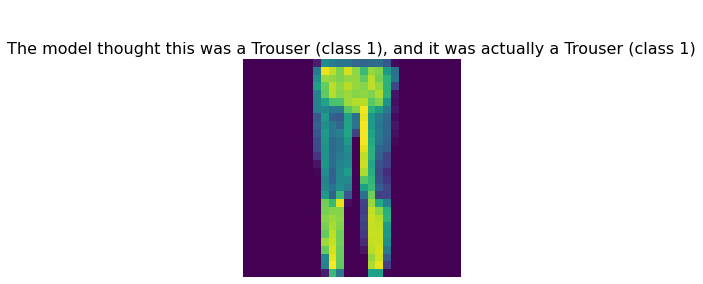

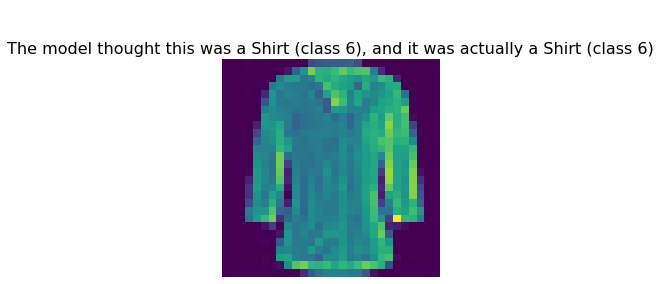

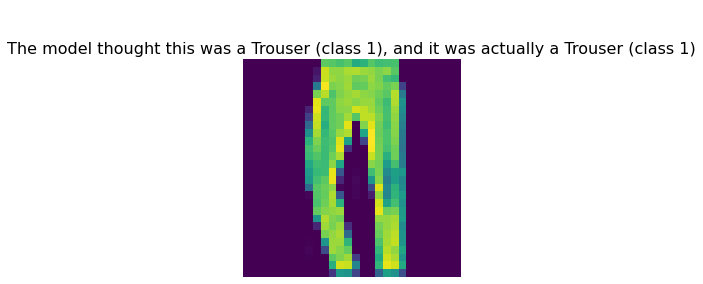

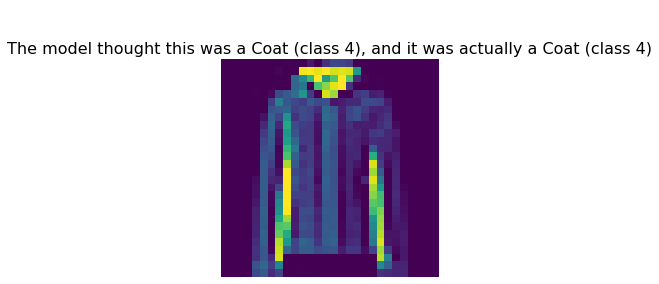

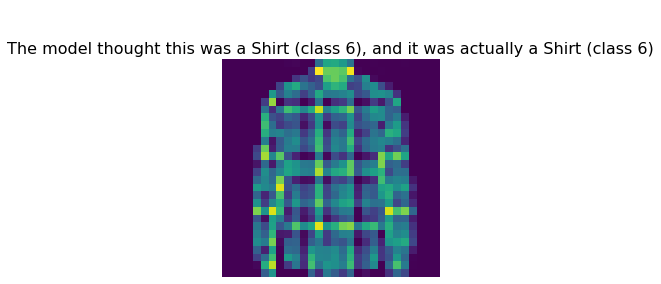

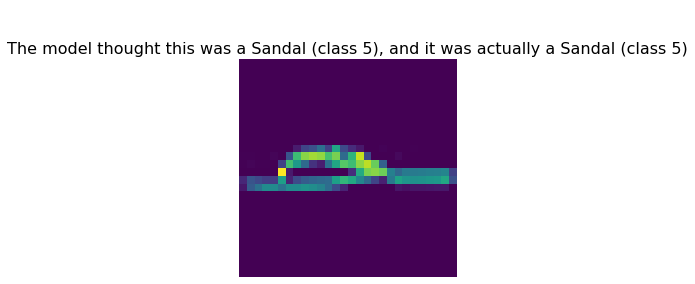

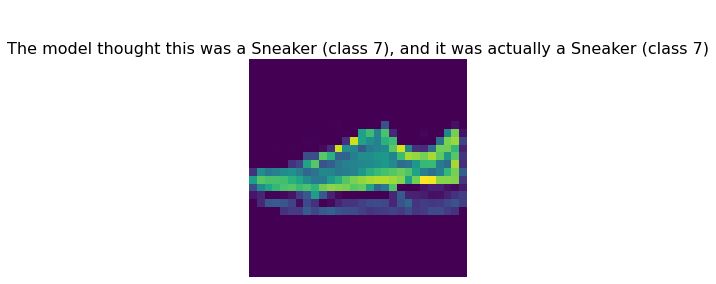

In [36]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/Fashion:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(10): 
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[y_test[i]], y_test[i]))